In [1]:
import pandas as pd

# Load the dataset
file_path = "Libian_desert_data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,0.000000000000000000e+00,0.000000000000000000e+00.1,0.000000000000000000e+00.2
0,1.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,4.0,0.0,0.0
4,5.0,0.0,0.0


In [2]:
df.columns= ["x","y","label"]
df.head()

,x,y,label
0,1.0,0.0,0.0
1,2.0,0.0,0.0
2,3.0,0.0,0.0
3,4.0,0.0,0.0
4,5.0,0.0,0.0


## Plotting

/Users/richardpitman/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


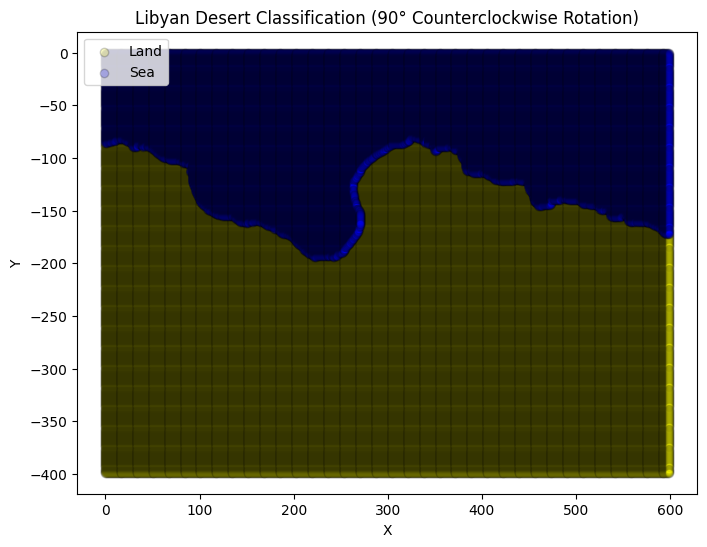

In [3]:
import matplotlib.pyplot as plt
# Apply 90-degree counterclockwise rotation transformation
df["x_rot"] = df["y"]
df["y_rot"] = -df["x"]

# Separate rotated data by label
land_rot = df[df["label"] == 1]
sea_rot = df[df["label"] == 0]

# Plot the rotated data
plt.figure(figsize=(8, 6))
plt.scatter(land_rot["x_rot"], land_rot["y_rot"], color="yellow", label="Land", alpha=0.2, edgecolors="black")
plt.scatter(sea_rot["x_rot"], sea_rot["y_rot"], color="blue", label="Sea", alpha=0.2, edgecolors="black")

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Libyan Desert Classification (90° Counterclockwise Rotation)")
plt.legend()
plt.show()

In [4]:
# You will build a neural network using Pytho/Matlab.
# Your implementation should follow a modular design to allow easy customization. 
# Implement the following functions: apply_rotate(input, angle): Rotates the input vector by a given angle and returns the results.
# apply_bias(input, b): Adds a bias term to the input vector and returns the results.
# apply_activation(input, activation='abs'): Applies an activation function.
# You should choose Absolute Value activation function in this part and others you’ll explore in part 3. 
# NOTE:e activation function does not necessarily need to be applied to the last layer. Rotation angle and bias for each layer should be tunable by hand. 
# Using these functions and by stacking multiple layers, you will build a neural network in part

import numpy as np
import math

def apply_rotate(input_vector, angle_degrees):
    
    angle_radians = math.radians(angle_degrees)
    rotation_matrix = np.array([
        [math.cos(angle_radians), -math.sin(angle_radians)],
        [math.sin(angle_radians), math.cos(angle_radians)]
    ])
    return np.dot(input_vector, rotation_matrix)

def apply_bias(input_vector, bias_vector):
    return input_vector + bias_vector

def apply_activation(input_vector, activation='abs'):

    if activation == 'abs':
        return np.abs(input_vector)
    if activation == 'relu':
        return np.maximum(0, input_vector)
    if activation == 'sigmoid':
        return 1 / (1 + np.exp(-input_vector))
    if activation == 'tanh':
        return np.tanh(input_vector)
    else:
        raise ValueError(f"Unsupported activation function: {activation}")

def visualize_decision_boundary_heatmap(network, input_data, labels, x_min, x_max, y_min, y_max, grid_resolution=500):

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_resolution),
                         np.linspace(y_min, y_max, grid_resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Get probabilities for Class 1 (or the positive class)
    predictions = np.array([network.forward(point.reshape(1, 2))[0, 0] for point in grid_points])
    predictions_grid = predictions.reshape(xx.shape)

    plt.figure(figsize=(10, 6))

    # Use RdBu colormap to show probability of Class 1
    plt.imshow(predictions_grid, extent=(x_min, x_max, y_min, y_max), origin="lower", aspect="auto", cmap=plt.cm.RdBu, alpha=0.6)

    # Plot original data points (consistent colors)
    plt.scatter(input_data[labels == 0][:, 0], input_data[labels == 0][:, 1], label='Class 0 (Sea)', color='blue')
    plt.scatter(input_data[labels == 1][:, 0], input_data[labels == 1][:, 1], label='Class 1 (Land)', color='red')

    plt.title("Neural Network Decision Boundary (Heatmap)")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.colorbar(label="Probability of Class 1")  # Label the colorbar
    plt.grid(False)
    plt.show()

def visualize_raw_predictions(network, x_min, x_max, y_min, y_max, grid_resolution=500):
    """
    Visualizes the raw probability predictions of the neural network.
    """
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, grid_resolution),
                         np.linspace(y_min, y_max, grid_resolution))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Get raw probability predictions
    predictions = np.array([network.forward(point.reshape(1, 2))[0, 0] for point in grid_points])
    predictions_grid = predictions.reshape(xx.shape)

    # Plot raw predictions as a heatmap
    plt.figure(figsize=(6, 6))
    plt.gca().set_aspect("equal")
    plt.imshow(predictions_grid, extent=(x_min, x_max, y_min, y_max), origin="lower", aspect="auto", cmap=plt.cm.RdBu)
    plt.title("Neural Network Raw Predictions (Probabilities)")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.colorbar(label="Probability of Class 1")
    #plt.grid(False)
    plt.show()


In [ ]:
class Layer:
    def __init__(self, rotation_angle, bias_vector, activation='abs'):
        self.rotation_angle = rotation_angle
        self.bias_vector = bias_vector
        self.activation = activation

    def forward(self, input_vector):
        rotated_vector = apply_rotate(input_vector, self.rotation_angle)
        biased_vector = apply_bias(rotated_vector, self.bias_vector)
        activated_vector = apply_activation(biased_vector, self.activation)
        return activated_vector
    
    def rotate_only(self, input_vector): # Added for visualization
        return apply_rotate(input_vector, self.rotation_angle)

class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers

    def forward(self, input_vector):
        output = input_vector
        states = [output]  # Store the original input as the first state

        for layer in self.layers:
            # Apply rotation
            rotated_output = layer.rotate_only(output)
            states.append(rotated_output)  # Save the rotated state
            
            # Apply bias
            biased_output = apply_bias(rotated_output, layer.bias_vector)
            states.append(biased_output)  # Save the biased state
            
            # Apply activation
            activated_output = apply_activation(biased_output, layer.activation)
            states.append(activated_output)  # Save the activated state
            
            # Update output to pass to the next layer
            output = activated_output

        return states  # Return all intermediate states



In [ ]:
# Sample input data (replace with your Libyan desert data)
X = df[["x", "y"]].values
y = df["label"].values

def add_layer(rotation_angle,bias_vector,activation):
    layers.append(Layer(rotation_angle=rotation_angle, bias_vector=bias_vector, activation=activation))
    return None

# Create layers to seperate land and sea
# zigzag pattern down the middle 6 layers
layers = []
add_layer(25, np.array([-200, 200]), 'abs')
add_layer(12, np.array([-200, 200]), 'abs')
add_layer(90, np.array([-200, 200]), 'abs')
add_layer(45, np.array([-200, 200]), 'abs')
add_layer(18, np.array([-200, 200]), 'abs')
add_layer(18, np.array([-200, 200]), 'abs')
add_layer(9, np.array([-200, 200]), 'abs')
add_layer(9, np.array([-200, 200]), 'abs')

# Create the neural network from defined layers

network = NeuralNetwork(layers)

# Set the range of x and y coordinates
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1


# Plot the results
#visualize_decision_boundary_heatmap(network, X, y, x_min, x_max, y_min, y_max)
#visualize_raw_predictions(network, x_min, x_max, y_min, y_max)

TypeError: list indices must be integers or slices, not tuple

Creating sample data similar to the Libyan desert example...
Creating animation of network transformations...


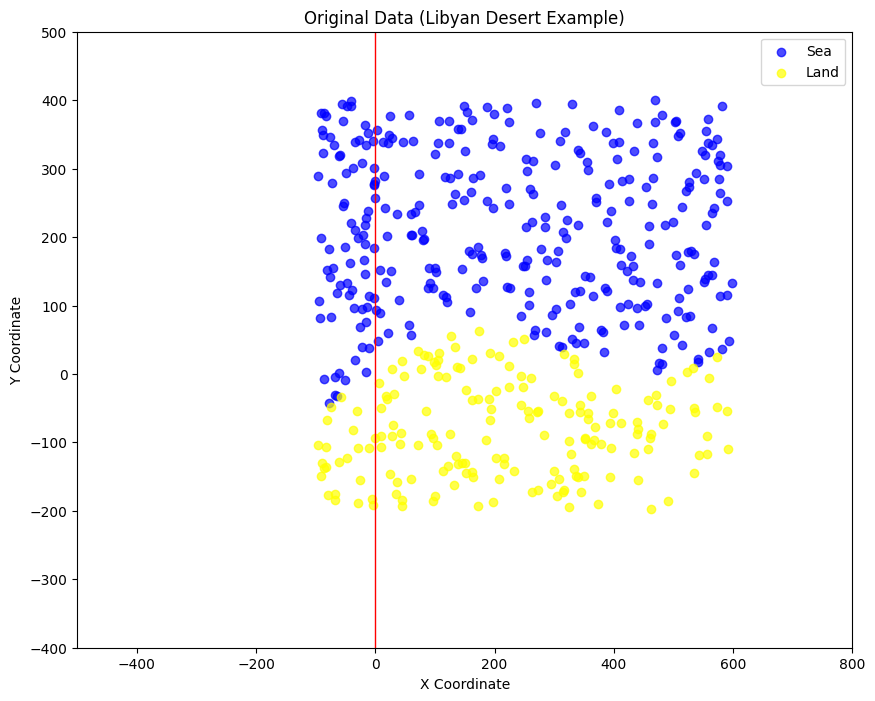

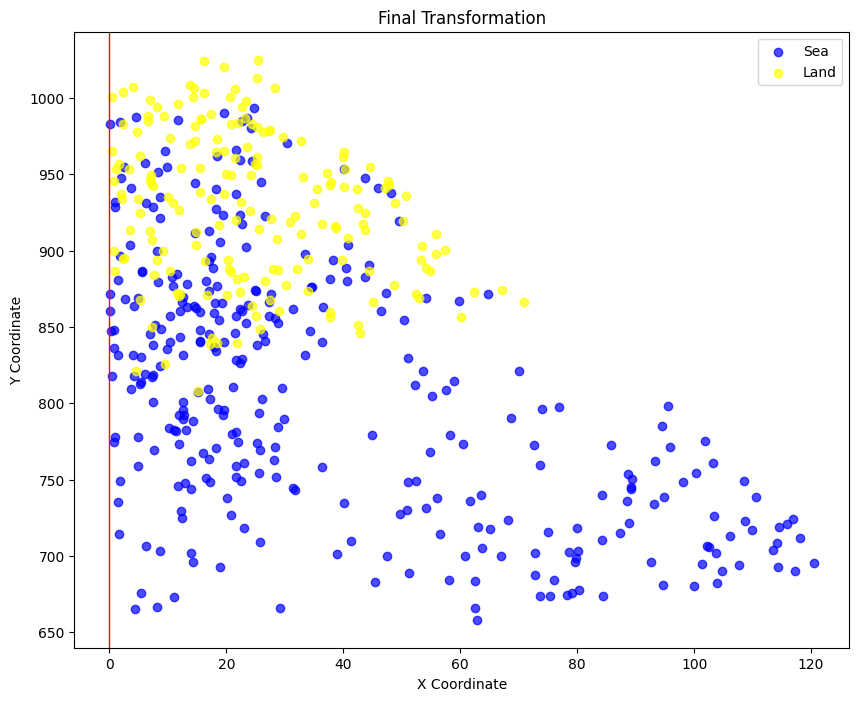

Animation created and saved as 'neural_network_transformation.gif'
You can view the animation by opening the GIF file


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.animation as animation

def create_animation(X, y, model, save_path=None):
    """
    Create an animation showing how data transforms through the neural network layers.
    
    Args:
        X: Input data
        y: Labels
        model: Neural network model
        save_path: If provided, save the animation to this path
        
    Returns:
        Animation object
    """
    # Get all transformation states
    states = model.forward(X)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Initialize scatter plots for each class
    sea_points = X[y == 0]
    land_points = X[y == 1]
    
    # Function to initialize the plot
    def init():
        ax.clear()
        ax.set_xlim(-500, 800)
        ax.set_ylim(-400, 500)
        ax.set_title('Neural Network Layer Transformations')
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        ax.axvline(x=0, color='red', linestyle='-', linewidth=1)
        return []
    
    # Function to update the plot for each frame
    def update(frame):
        ax.clear()
        
        # Get current state
        current_state = states[frame]
        
        # Plot sea points (class 0) in blue
        sea_transformed = current_state[y == 0]
        ax.scatter(sea_transformed[:, 0], sea_transformed[:, 1], 
                  color='blue', label='Sea', alpha=0.7)
        
        # Plot land points (class 1) in yellow
        land_transformed = current_state[y == 1]
        ax.scatter(land_transformed[:, 0], land_transformed[:, 1], 
                  color='yellow', label='Land', alpha=0.7)
        
        # Add red vertical line
        ax.axvline(x=0, color='red', linestyle='-', linewidth=1)
        
        # Set title based on current transformation
        operations = ['Original', 'Rotate', 'Bias', 'Activate']
        layer_idx = (frame) // 3
        operation_idx = (frame) % 3
        
        if frame == 0:
            title = "Original Data"
        else:
            title = f"Layer {layer_idx+1} - {operations[operation_idx+1]}"
            
        ax.set_title(title)
        ax.set_xlim(-500, 800)
        ax.set_ylim(-400, 500)
        ax.legend()
        
        return []
    

    # Create animation
    ani = FuncAnimation(fig, update, frames=len(states),
                        init_func=init, blit=True, interval=800)
    
    # Save animation if requested
    if save_path:
        ani.save(save_path, writer='pillow', fps=1)
    
    plt.close()
    return ani

def create_transformation_demo():
    """
    Create a demo showing how a simple neural network transforms the Libyan desert data.
    """
    # Create sample data if needed
    print("Creating sample data similar to the Libyan desert example...")
    np.random.seed(42)
    n_samples = 500
    
    # Generate sample coordinates to look similar to the image
    X = np.random.uniform(low=[-100, -200], high=[600, 400], size=(n_samples, 2))
    
    # Generate labels based on a curve similar to the example image
    # Create a wavy boundary to separate sea and land
    def boundary_func(x):
        return 50 * np.sin(x/100) + 0.1 * x
        
    y = (X[:, 1] < boundary_func(X[:, 0])).astype(int)
    
    # Define a model for demonstration
    config = [
        # Layer 1: Small rotation to better align data
        {'angle': np.pi/8, 'bias': np.array([0.0, 0.0]), 'activation': 'abs'},
        
        # Layer 2: Apply bias to shift boundary
        {'angle': 0.0, 'bias': np.array([0.0, -50.0]), 'activation': 'abs'},
        
        # Layer 3: Further rotation
        {'angle': -np.pi/6, 'bias': np.array([0.0, 0.0]), 'activation': 'abs'},
        
        # Layer 4: Final adjustment
        {'angle': 0.0, 'bias': np.array([0.0, 20.0]), 'activation': 'abs'}
    ]
    
    # Create model
    #model = NeuralNetwork(config)
    model = network
    
    # Create animation
    print("Creating animation of network transformations...")
    ani = create_animation(X, y, model, save_path="neural_network_transformation.gif")
    
    # Plot original data
    plt.figure(figsize=(10, 8))
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='blue', label='Sea', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='yellow', label='Land', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='-', linewidth=1)
    plt.title('Original Data (Libyan Desert Example)')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.xlim(-500, 800)
    plt.ylim(-400, 500)
    plt.legend()
    plt.show()
    
    # Plot final transformation
    final_state = model.forward(X)[-1]
    plt.figure(figsize=(10, 8))
    plt.scatter(final_state[y == 0, 0], final_state[y == 0, 1], 
               color='blue', label='Sea', alpha=0.7)
    plt.scatter(final_state[y == 1, 0], final_state[y == 1, 1], 
               color='yellow', label='Land', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='-', linewidth=1)
    plt.title('Final Transformation')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()
    
    print("Animation created and saved as 'neural_network_transformation.gif'")
    print("You can view the animation by opening the GIF file")

if __name__ == "__main__":
    create_transformation_demo()